<a href="https://colab.research.google.com/github/DSHYOJIN/my-first-repository/blob/master/%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_MainQuest03%EC%9D%98_%EA%B9%80%ED%9A%A8%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
!pip install kagglehub

In [42]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [45]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [46]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [48]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,4,12


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [49]:
# 데이터셋에서 무작위로 1000개의 표본 추출
sample_df = df.sample(n=1000, random_state=42)

# 전체 데이터셋과 표본 데이터셋의 'TotalPrice' 평균 및 표준편차 계산
p_mean = df['TotalPrice'].mean()
p_std = df['TotalPrice'].std()
s_mean = sample_df['TotalPrice'].mean()
s_std = sample_df['TotalPrice'].std()

# 결과 출력
print(f"전체 데이터셋 'TotalPrice' 평균: {p_mean:.2f}")
print(f"전체 데이터셋 'TotalPrice' 표준편차: {p_std:.2f}")
print(f"표본 데이터셋 (1000개) 'TotalPrice' 평균: {s_mean:.2f}")
print(f"표본 데이터셋 (1000개) 'TotalPrice' 표준편차: {s_std:.2f}")

전체 데이터셋 'TotalPrice' 평균: 17.99
전체 데이터셋 'TotalPrice' 표준편차: 378.81
표본 데이터셋 (1000개) 'TotalPrice' 평균: 16.83
표본 데이터셋 (1000개) 'TotalPrice' 표준편차: 64.47


**중심극한정리 ~ 모집단과 표본의 차이**

중심극한정리(Central Limit Theorem)는 모집단의 분포와 상관없이 충분히 큰 크기의 표본들을 여러 번 추출하면 그 표본 평균들의 분포가 정규분포에 가까워진다는 이론.
또한, 표본 평균의 평균은 모집단의 평균과 같아지고, 표본 평균의 표준편차(표준 오차)는 모집단 표준편차를 표본 크기의 제곱근으로 나눈 값과 같아짐.

위 결과에서 보듯이, 1000개의 표본에서 계산된 'TotalPrice'의 평균은 전체 데이터셋의 평균과 매우 유사. 이는 CLT에 따라 표본 평균의 모집단 평균에 가깝게 수렴하는 경향을 보여줌.

표본의 표준편차는 전체 데이터셋의 표준편차와 차이가 있음. 이는 표본의 표준편차가 개별 표본 내의 변동성을 나타내는 반면, CLT에서 다루는 것은 '표본 평균들의 분포'의 표준편차(표준 오차)이기 때문. 표본 크기가 커질수록 표본의 평균은 더욱 모집단의 평균에 가까워지고, 표본 평균들의 분포는 더욱 좁아짐.

따라서 추출된 1000개의 표본은 모집단의 특성을 어느 정도 대표하며, 특히 평균값은 CLT에 따라 모집단의 평균에 근접한 값을 보여줌.

---
---
---




## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [50]:
from scipy import stats

# 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가 찾기
top_countries = df['Country'].value_counts().nlargest(2).index.tolist()
print(f"주문이 가장 많은 상위 두 국가: {top_countries}")

# 상위 두 국가 데이터 필터링
country1_df = df[df['Country'] == top_countries[0]]
country2_df = df[df['Country'] == top_countries[1]]

# 독립표본 t-검정 수행
# 등분산 가정 t-검정 (Student's t-test)
# 비등분산 가정 t-검정 (Welch's t-test)
# equal_var=False는 Welch's t-test를 사용하여 등분산성 가정을 만족하지 않아도 됨
t_statistic, p_value = stats.ttest_ind(country1_df['TotalPrice'], country2_df['TotalPrice'], equal_var=False)

# 결과 출력
print(f"독립표본 t-검정 결과 ({top_countries[0]} vs {top_countries[1]}):")
print(f"t-통계량: {t_statistic:.4f}")
print(f"p-값: {p_value:.4f}")

주문이 가장 많은 상위 두 국가: ['United Kingdom', 'Germany']
독립표본 t-검정 결과 (United Kingdom vs Germany):
t-통계량: -10.0464
p-값: 0.0000


**t-검정 결과 해석 및 오류 설명**

독립표본 t-검정 결과
- t-통계량: -10.0464
- p-값: 0.0000

일반적으로 유의수준(alpha)을 0.05로 설정

- p-값 해석:
  - 만약, p-값이 유의수준보다 작으면, 귀무가설(두 국가의 'TotalPrice' 평균에 차이가 없다)을 기각하고 대립가설(두 국가의 'TotalPrice' 평균에 통계적으로 유의미한 차이가 있다)을 채택
  - 만약, p-값이 유의수준보다 크거나 같으면 귀무가설을 기각할 충분한 증거가 없다고 판단

위 결과의 p-값이 유의수준보다 작기 때문에 두 국가 간 'TotalPrice' 평균에 유의미한 차이가 있다고 결론 내릴 수 있다.

- 1종 오류: 실제로는 귀무가설이 참(차이가 없음)인데 대립가설을 채택하는 오류. 즉 차이가 없는데 차이가 있다고 잘못 판단하는 경우..1종 오류를 범할 확률은 유의수준(alpha)와 같다.

- 2종 오류: 실제로는 대립가설이 참(차이가 있음)인데, t-검정 결과 귀무가설을 기각하고 대립가설을 채택하는 오류. 즉 차이가 있는데 차이가 없다고 잘못 판단하는 경우..2종 오류를 범할 확률은 베타(beta).. 표본의 크기가 작거나 효과 크기가 작을 때 발생하기 쉬움.
검정력(1-beta)


---
---
---




## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [51]:
# 나중을 위해 3번만의 데이터 전처리 시행
# 'UnitPrice'가 0보다 큰 데이터만 필터링하여 새 데이터 프레임 생성
df_cleaned = df[df['UnitPrice'] > 0].copy()

print(f"원본 데이터프레임 크기: {df.shape}")
print(f"'UnitPrice > 0' 필터링 후 데이터프레임 크기: {df_cleaned.shape}")

원본 데이터프레임 크기: (541909, 11)
'UnitPrice > 0' 필터링 후 데이터프레임 크기: (539392, 11)


In [52]:
# 주중/주말 구분 (월요일=0, 일요일=6)
df_cleaned['DayType'] = df_cleaned['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 주중 데이터와 주말 데이터 분리
weekday_df_cleaned = df_cleaned[df_cleaned['DayType'] == 'Weekday']
weekend_df_cleaned = df_cleaned[df_cleaned['DayType'] == 'Weekend']

# 'UnitPrice'의 기술 통계량 계산 (주중)
print("## 주중 UnitPrice 분포 분석 (UnitPrice > 0)")
display(weekday_df_cleaned['UnitPrice'].describe())

# 'UnitPrice'의 기술 통계량 계산 (주말)
print("\n## 주말 UnitPrice 분포 분석 (UnitPrice > 0)")
display(weekend_df_cleaned['UnitPrice'].describe())

## 주중 UnitPrice 분포 분석 (UnitPrice > 0)


,UnitPrice
count,475022.000000
mean,4.915613
std,100.776713
min,0.001000
25%,1.250000
50%,2.100000
75%,4.130000
max,38970.000000



## 주말 UnitPrice 분포 분석 (UnitPrice > 0)


,UnitPrice
count,64370.000000
mean,2.888049
std,7.959766
min,0.001000
25%,1.250000
50%,1.850000
75%,3.750000
max,1236.750000


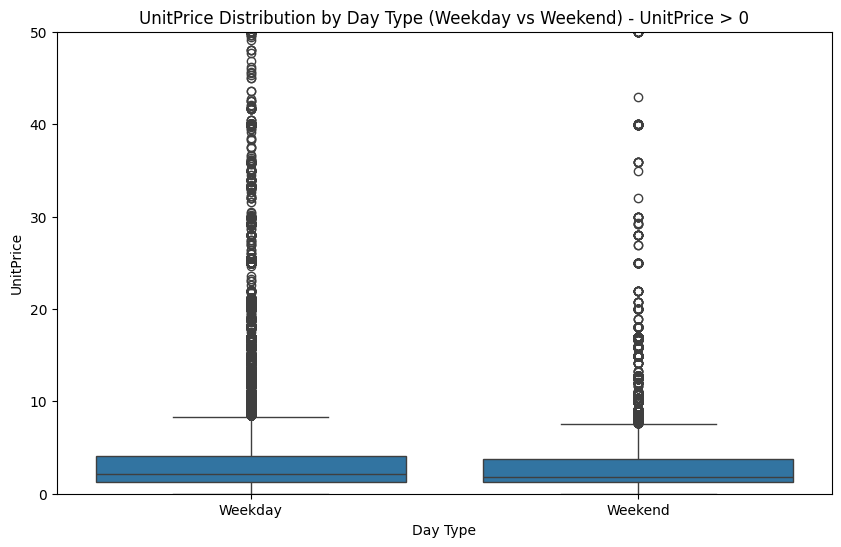

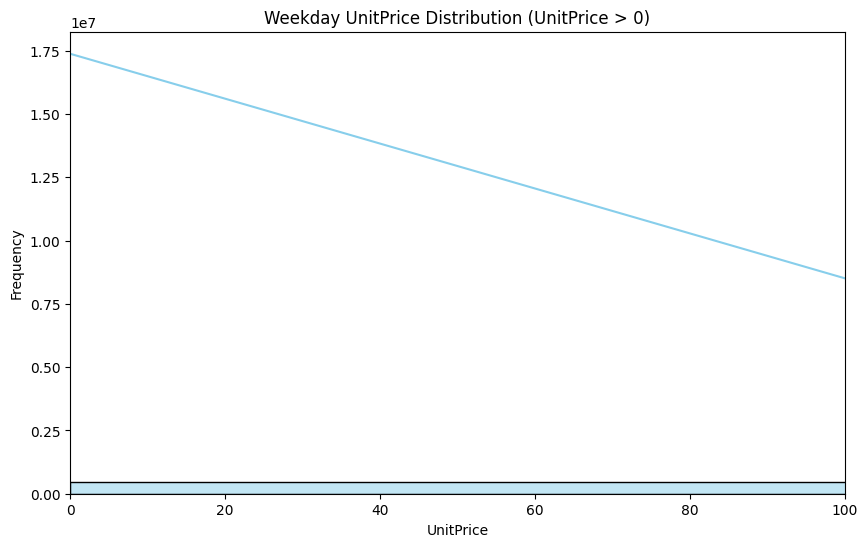

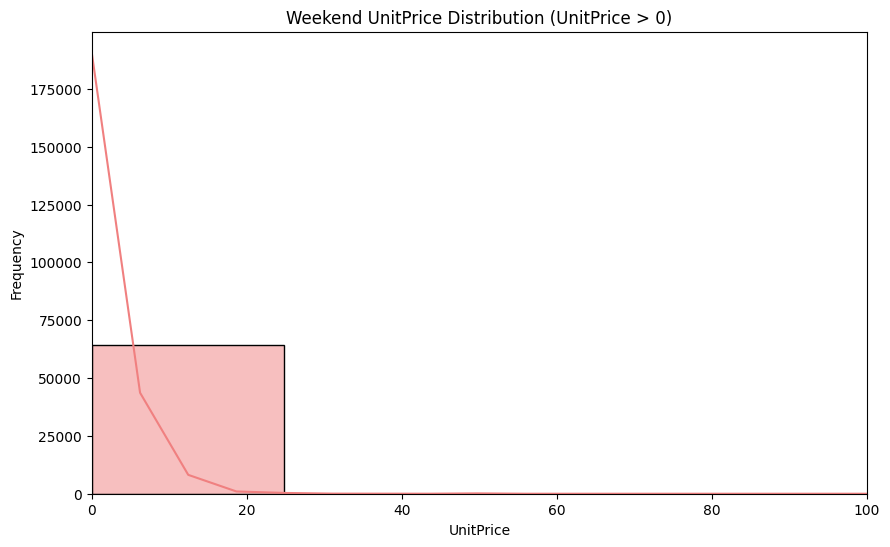

In [53]:
# UnitPrice의 상자수염그림 그리기 (주중 vs 주말)
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayType', y='UnitPrice', data=df_cleaned)
plt.title('UnitPrice Distribution by Day Type (Weekday vs Weekend) - UnitPrice > 0')
plt.xlabel('Day Type')
plt.ylabel('UnitPrice')
plt.ylim(0, 50) # 이상치 영향 줄이기 위해 y축 범위 제한
plt.show()

# UnitPrice의 히스토그램 그리기 (주중)
plt.figure(figsize=(10, 6))
sns.histplot(weekday_df_cleaned['UnitPrice'], bins=50, kde=True, color='skyblue')
plt.title('Weekday UnitPrice Distribution (UnitPrice > 0)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.xlim(0, 100) # 이상치 영향 줄이기 위해 x축 범위 제한
plt.show()

# UnitPrice의 히스토그램 그리기 (주말)
plt.figure(figsize=(10, 6))
sns.histplot(weekend_df_cleaned['UnitPrice'], bins=50, kde=True, color='lightcoral')
plt.title('Weekend UnitPrice Distribution (UnitPrice > 0)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.xlim(0, 100) # 이상치 영향 줄이기 위해 x축 범위 제한
plt.show()

**주중/주말 UnitPrice 분포 분석 및 시각화 해석**

기술 통계량 분석
- 중심경향치 (평균, 중간값): 주중과 주말의 평균 및 중간값 차이를 통해 어떤 요일에 판매 단가가 더 높은 경향이 있는지 알 수 있다..
- 변상성 (표준편차, 분산): 표준편차를 통해 주중과 주말 각각의 'UnitPrice'가 평균으로부터 얼마나 퍼져 있는지 알 수 있다.. 표준편차가 클수록 데이터의 변동성이 크다는 의미!
- 분위수: 데이터의 분포 형태와 이상치의 존재 여부를 대략적으로 파악할 수 있다..
---
시각화 해석 (상자수염그림 및 히스토그램)
- 상자수염그림:
  - 상자 (Box): 데이터의 중앙 50% 범위. 상자 아래 1사분위수, 상자 위 3사분위수. 상자의 높이는 사분위 범위(IQR = Q3 - Q1)
  - 상자 안의 선: 중앙값(Median)
  - 수염: 상자 위아래로 뻗어 있는 'T자 모양의 선'..일반적으로 상자의 경계로부터 1.5 * IQR 이내에 있는 데이터 중 가장 멀리 떨어진 값까지 나타냄..수염은 이상치가 아닌 데이터의 범위를 보여줌..
  - 이상치: 수염 밖으로 떨어진 개별 점들..일반적으로 1.5 * IQR 범위를 벗어나는 데이터 포인트
---
- 해석: 이 상자 수염 그림은 'UnitPrice'의 대부분 데이터가 낮은 가격대에 집중되어 있지만, 동시에 일반적인 범위를 벗어나는 고가의 이상치 데이터가 많이 존재한다는 것을 보여주고 있다..

---

- 히스토그램:
  - 분포의 형태: 두 히스토그램 모두 낮은 'UnitPrice'값에 데이터가 매우 집중되어 있고, 오른쪽으로 긴 꼬리를 가지는 오른쪽 비대칭 형태를 보인다. 대부분의 거래가 저렴한 상품에서 발생하고 소수의 고가 상품 거래가 분포의 오른쪽 꼬리를 형성함을 알 수 있다. 주중 히스토그램의 꼬리가 주말 히스토그램의 꼬리보다 더 길고 넓게 퍼져 있는 것으로 보아, 주중 거래에서 훨씬 높은 가격의 이상치가 발생할 가능성이 더 높다..
  - 중심위치: 주중의 평균과 중앙값이 > 주말의 평균과 중앙값 이다. 히스토그램에서도 주중 분포의 봉우리가 주말 분포의 봉우리보다 약간 더 오른쪽에 위치하거나, 오른쪽 꼬리가 더 길게 뻗어 있다.
  이는 주중 거래의 평균적인 단가가 주말 거래보다 약간 더 높을 수 있음을 시사한다. 다만, 평균값은 이상치에 크게 영향을 받으므로 중간값이나 최빈값을 함계 고려하는 것이 더 정확한 중심 위치를 파악하는 데 도움이 된다.
  - 산포(변동성): 주중 표준편차 > 주말 표준편차.. 히스토그램에서도 주중 분포가 주말 분포보다 훨씬 더 넓은 범위(특히 높은 가격대)에 걸쳐 퍼져 있는 것을 볼 수 있음. 이는 주중 거래의 'UnitPrice' 가 평균으로부터 더 넓게 퍼져 있으며 변동성이 크다는 것을 의미..반면 주말 거래는 'UnitPrice'가 비교적 좁은 범위에 집중되어 있어 변동성이 작다.
  
---
- 대부분의 거래가 낮은 단위 가격으로 이루어진다.
- 주중 거래는 주말 거래에 비해 평균 단위 가격이 약간 더 높고, 특히 단위 가격의 변동성(퍼져 있는 정도)이 훨씬 크다. 이는 주중에 매우 고가의 상품 거래가 자주 발생하거나 더 높은 가격의 상품이 판매되는 경향이 있음을 시사
- 주말 거래는 주중에 비해 단위 가격이 비교적 낮은 범위에 집중되어 있으며 안정적인 패턴을 보임.

---
---
---


## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [54]:
# 칼럼 선택하기
regression_df = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# 결측치 제거하기
regression_df.isnull().sum()
regression_df.dropna(inplace=True)

print("전처리 완료 후 DataFrame의 형태: ")
regression_df.shape

전처리 완료 후 DataFrame의 형태: 


(541909, 5)

In [55]:
# 상품단가, 판매수량 컬럼에서 0보다 작거나 같은 행 제거
regression_df = regression_df[(regression_df['Quantity'] > 0) & (regression_df['UnitPrice'] > 0)].copy()

# 상위 1% 값은 이상치로 보고 제거
quantity_threshold = regression_df['Quantity'].quantile(0.99)
unitprice_threshold = regression_df['UnitPrice'].quantile(0.99)

regression_df = regression_df[(regression_df['Quantity'] <= quantity_threshold) & (regression_df['UnitPrice'] <= unitprice_threshold)].copy()

print("이상치 제거 후 DataFrame의 형태:")
regression_df.shape

이상치 제거 후 DataFrame의 형태:


(520182, 5)

In [56]:
# 데이터 전처리가 된 후
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520182 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Quantity      520182 non-null  int64  
 1   UnitPrice     520182 non-null  float64
 2   Country       520182 non-null  object 
 3   DayOfWeek     520182 non-null  int32  
 4   InvoiceMonth  520182 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 19.8+ MB


In [57]:
# 원-핫 인코딩 수행
country_dummies = pd.get_dummies(regression_df['Country'], prefix='Country')

# 원-핫 인코딩된 결과를 기존 데이터프레임에 병합하고 원래 'Country' 컬럼 제거
regression_df = pd.concat([regression_df, country_dummies], axis=1)
regression_df.drop('Country', axis=1, inplace=True)

# 변경된 데이터프레임의 첫 5행 출력
regression_df.head()

,Quantity,UnitPrice,DayOfWeek,InvoiceMonth,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,6,3.39,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,2.75,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,3.39,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6,3.39,2,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [58]:
# 데이터 분할
# 모델 학습과 평가를 위해 데이터를 훈련 세트와 테스트 세트로 나누기

from sklearn.model_selection import train_test_split

# 독립 변수와 종속 변수 정의
X = regression_df.drop('Quantity', axis=1)
y = regression_df['Quantity']

# 데이터를 훈련 세트(Training)와 테스트 세트(Testing)로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''
테스트 세트에는 있지만 훈련 세트에 없는 범주가 있으면 안됨.
훈련 데이터에서 본 패턴만을 인식하고 활용하여 독립변수와 종속변수의 사이를 예측.
So, 한 번도 xx 데이터라면 모델의 성능이 저하되거나 오류가 발생
'''

# Print the shapes of the split datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (416145, 41)
Shape of X_test: (104037, 41)
Shape of y_train: (416145,)
Shape of y_test: (104037,)


In [59]:
# 모델 학습
from sklearn.linear_model import LinearRegression

# 선택된 독립변수와 종속변수를 사용하여 다중 선형 회귀 모델을 학습
# Create a Linear Regression model object
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# 모델 평가 및 해석

# 테스트 세트에 대해 'Quantity'를 예측
y_pred = model.predict(X_test)

# 테스트 세트에 대한 결정계수(R-squared) 점수를 계산(1에 가까울수록 모델이 종속 변수의 분산을 잘 설명한다는 의미)
r_squared = model.score(X_test, y_test)

# 모델의 (편)회귀계수와 독립 변수(피처) 이름 추출
coefficients = model.coef_
feature_names = X_train.columns

# 해당 독립 변수 이름(feature_names) 리스트와 회귀계수(coef) 배열을 짝지은 후, 딕셔너리 형태로..
coef_dict = dict(zip(feature_names, coefficients))

# Print the R-squared score
print(f"(테스트세트의) 결정계수 점수: {r_squared:.4f}")

# Print the coefficients
print("회귀계수:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")

(테스트세트의) 결정계수 점수: 0.1210
회귀계수:
UnitPrice: -1.0571
DayOfWeek: -0.1425
InvoiceMonth: -0.0344
Country_Australia: 18.3362
Country_Austria: -5.2145
Country_Bahrain: 5.6914
Country_Belgium: -3.9139
Country_Brazil: -1.0175
Country_Canada: -3.2910
Country_Channel Islands: -3.4624
Country_Cyprus: -6.0220
Country_Czech Republic: 9.6542
Country_Denmark: 3.7232
Country_EIRE: -1.2268
Country_European Community: -5.2720
Country_Finland: -1.1578
Country_France: -3.4172
Country_Germany: -3.0779
Country_Greece: -4.1394
Country_Hong Kong: -0.5932
Country_Iceland: -3.5164
Country_Israel: -0.7914
Country_Italy: -4.2429
Country_Japan: 25.4017
Country_Lebanon: -5.3026
Country_Lithuania: 3.4609
Country_Malta: -6.6295
Country_Netherlands: 30.2008
Country_Norway: 1.3190
Country_Poland: -3.9670
Country_Portugal: -5.3304
Country_RSA: -7.6513
Country_Saudi Arabia: -7.1604
Country_Singapore: 8.1822
Country_Spain: -5.2784
Country_Sweden: 6.3736
Country_Switzerland: -0.6199
Country_USA: -3.0995
Country_United Arab E

** 회귀 모델 분석 결과 해석**

- 결정계수 (R-squared) 해석:
  테스트 세트의 결정계수 값은 0.1210 입니다. 이는 이 모델에서 사용된 독립 변수들이 'Quantity'의 분산 중 약 12%를 설명한다는 것을 의미합니다. 근데?? 꽤 낮죠?? 이 모델이 예측에 있어 설명력이 제한적임을 시사합니다.
  즉! 모델에 포함되지 않은 다른 요인들이 판매 수량에 상당한 영향을 미치고 있을 가능성이 높습니다.
  예를들어~! 상품의 인기도, 프로모션 활동, 계절성, 고객 행동 패턴 등이 판매 수량에 더 큰 영향을 줄 수 있으며, 이러한 요인들은 현재 모델에 포함되지 않았습니다.

- 회귀계수 (Reression Coefficients) 해석:
  각 독립 변수의 회귀계수는 다른 모든 변수가 일정할 때 해당 변수가 'Quantity' 예측값에 미치는 영향의 크기와 방향을 나타냅니다.
  - UnitPrice: -1.0571 / 이 음수 계수는 다른 모든 변수가 일정할 때, 단위 당 가격이 한 단위 증가할 때마다 예측되는 Quatity는 -1.0571 만큼 감소하는 경향이 있음을 시사합니다. 이는 가격이 오르면 수요가 감소하는 일반적인 경제 원칙과 일치합니다!

  - DayOfWeek: -0.1425 / 이는 다른 요인이 일정할 때, 요일 값이 증가할수록 (월요일=0 에서 일요일=6으로 갈수록) Quantity가 아주 약간 감소하는 경향을 보인다는 것을 나타냅니다. 하지만 그 영향의 크기는 작은 편입니다.

  - InvoiceMonth: -0.0344 / 이는 다른 요인이 일정할 때, 월이 증가함에 따라 Quantity가 아주 미미하게 감소하는 음의 상관관계가 있음을 시사합니다. 이 변수의 영향력은 매우 작습니다.
  
  - Country: 각 국가 더미 변수의 회귀계수는 기준 국가(원-핫 인코딩 시 제외된 국가)와 비교했을 때 해당 국가의 Quantity 예측값 차이를 나타냅니다. 예를들어, Country_United Kingdom: -8.0108 영국의 거래는 다른 요인이 일정할 때, 기준 국가에 비해 예측되는 평균 Quantity가 약 -8.0108 단위 더 낮게 나타나는 것과 관련이 있습니다. (참고: 어떤 국가가 기준 국가로 설정되었는지에 따라 다른 국가들의 계수 해석이 달라집니다. pandas는 일반적으로 알파벳 순서로 첫 번째 국가를 기본 기준 범주로 설정하는 경향이 있습니다.)

---

 전반적으로, 이 모델은 사용된 독립 변수와 'Quantity' 사이에 일부 관계가 있음을 보여주지만, 낮은 결정계수 값은 이러한 변수들만으로는 판매 수량을 강력하게 예측하기 어렵다는 것을 시사합니다. 판매 수량에 더 큰 영향을 미치는 다른 중요한 요인들이 모델에 포함되지 않았을 수 있습니다.

---
---
---

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [63]:
# 로지스틱 회귀 모델 학습에 필요한 데이터를 정리
regression_df_logistic = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# 'Quantity' 피쳐를 활용하여 해당 거래가 반품인지 아닌지를 나타내는 'IsReturn' 피쳐를 생성
# 'IsReturn' feature: 1(True, 반품), 0(False, 정상)
regression_df_logistic['IsReturn'] = (regression_df_logistic['Quantity'] < 0).astype(int)

# 결측치 제거
regression_df_logistic.dropna(inplace=True)

print("결측치 제거하고 IsReturn피처 생성 뒤 DataFrame")
display(regression_df_logistic.head())
display(regression_df_logistic.info())

DataFrame after selecting columns, creating 'IsReturn', and dropping NaNs:


,Quantity,UnitPrice,Country,DayOfWeek,InvoiceMonth,IsReturn
0,6,2.55,United Kingdom,2,12,0
1,6,3.39,United Kingdom,2,12,0
2,8,2.75,United Kingdom,2,12,0
3,6,3.39,United Kingdom,2,12,0
4,6,3.39,United Kingdom,2,12,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Quantity      541909 non-null  int64  
 1   UnitPrice     541909 non-null  float64
 2   Country       541909 non-null  object 
 3   DayOfWeek     541909 non-null  int32  
 4   InvoiceMonth  541909 non-null  int32  
 5   IsReturn      541909 non-null  int64  
dtypes: float64(1), int32(2), int64(2), object(1)
memory usage: 20.7+ MB


None

In [71]:
# 'Quantity' and 'UnitPrice' 이상치 제거
# 'Quantity'에서 이상치를 찾을 때, 절댓값을 사용하겠다. 반품거래는 음수 수량을 가지기 때문에..
quantity_threshold_logistic = regression_df_logistic['Quantity'].abs().quantile(0.99)
unitprice_threshold_logistic = regression_df_logistic['UnitPrice'].quantile(0.99)

regression_df_logistic = regression_df_logistic[
    (regression_df_logistic['Quantity'].abs() <= quantity_threshold_logistic) &
    (regression_df_logistic['UnitPrice'] <= unitprice_threshold_logistic)
].copy()

print("이상치 제거 후 DataFrame 형태:")
print(regression_df_logistic.shape)

print("DataFrame 정보:")
display(regression_df_logistic.info())

이상치 제거 후 DataFrame 형태:
(522176, 43)
DataFrame 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 522176 entries, 0 to 541908
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Quantity                      522176 non-null  int64  
 1   UnitPrice                     522176 non-null  float64
 2   DayOfWeek                     522176 non-null  int32  
 3   InvoiceMonth                  522176 non-null  int32  
 4   IsReturn                      522176 non-null  int64  
 5   Country_Australia             522176 non-null  bool   
 6   Country_Austria               522176 non-null  bool   
 7   Country_Bahrain               522176 non-null  bool   
 8   Country_Belgium               522176 non-null  bool   
 9   Country_Brazil                522176 non-null  bool   
 10  Country_Canada                522176 non-null  bool   
 11  Country_Channel Islands       522176 non-null  bool   
 12 

None

In [75]:
# 'IsReturn'피처의 값 개수(불균형 확인..)
return_counts = regression_df_logistic['IsReturn'].value_counts()

# % 계산
return_percentages = regression_df_logistic['IsReturn'].value_counts(normalize=True) * 100

print("개수 'IsReturn':")
print(return_counts)
print("% 'IsReturn':")
print(return_percentages)

# 반품 거래와 정상 거래의 비율이 크게 차이 날 경우, 모델 성능 향상을 위해 데이터 불균형 문제를 해결하는 방법을 고려함..balanced..

개수 'IsReturn':
IsReturn
0    512731
1      9445
Name: count, dtype: int64
% 'IsReturn':
IsReturn
0    98.191223
1     1.808777
Name: proportion, dtype: float64


In [76]:
# 독립변수 중 'Country' 칼럼 = 범주형 변수임..
country_column = regression_df_logistic['Country']

# ohe
country_dummies_logistic = pd.get_dummies(country_column, prefix='Country')

# regression_df 에 ohe 된 거 합치기!!
regression_df_logistic = pd.concat([regression_df_logistic.drop('Country', axis=1), country_dummies_logistic], axis=1)

print("원-핫 인코딩된 후 DataFrame모습 확인:")
display(regression_df_logistic.head())
display(regression_df_logistic.info())

KeyError: 'Country'

In [77]:
from sklearn.model_selection import train_test_split

# 독립변수 X와 종속변수 y 정의하기
X_logistic = regression_df_logistic.drop('IsReturn', axis=1)
y_logistic = regression_df_logistic['IsReturn']

# 모델 학습과 검증을 위해 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Shape of X_train_logistic:", X_train_logistic.shape)
print("Shape of X_test_logistic:", X_test_logistic.shape)
print("Shape of y_train_logistic:", y_train_logistic.shape)
print("Shape of y_test_logistic:", y_train_logistic.shape)

Shape of X_train_logistic: (417740, 42)
Shape of X_test_logistic: (104436, 42)
Shape of y_train_logistic: (417740,)
Shape of y_test_logistic: (417740,)


In [78]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 테스트 세트의 데이터를 사용하여 모델이 예측
y_pred_logistic = model_logistic.predict(X_test_logistic)

# 평가

# 혼동행렬
# True Negative (TN): Actual 0, Predicted 0 (정상 거래를 정상으로 예측)
# False Positive (FP): Actual 0, Predicted 1 (정상 거래를 반품으로 잘못 예측 - 1종 오류와 관련)
# False Negative (FN): Actual 1, Predicted 0 (반품 거래를 정상으로 잘못 예측 - 2종 오류와 관련)
# True Positive (TP): Actual 1, Predicted 1 (반품 거래를 반품으로 올바르게 예측)
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
print("혼동 행렬 (Confusion Matrix):")
print(conf_matrix)

# 분류 보고서
# Precision: TP / (TP + FP) - 모델이 '반품'이라고 예측했을 때 실제로 반품일 확률
# Recall (Sensitivity): TP / (TP + FN) - 실제 반품 거래 중에서 모델이 올바르게 '반품'이라고 예측한 비율 (민감도)
# F1-score: 2 * (Precision * Recall) / (Precision + Recall) - 정밀도와 재현율의 조화 평균, 모델의 균형 잡힌 성능 평가
# Support: 각 클래스의 실제 데이터 수
print("분류 보고서 (Classification Report):")
print(classification_report(y_test_logistic, y_pred_logistic))

# 정확도
# (TP + TN) / Total - 전체 예측 중 올바르게 예측한 비율
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
print(f"정확도 (Accuracy Score): {accuracy:.4f}")

혼동 행렬 (Confusion Matrix):
[[102581      0]
 [     0   1855]]
분류 보고서 (Classification Report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102581
           1       1.00      1.00      1.00      1855

    accuracy                           1.00    104436
   macro avg       1.00      1.00      1.00    104436
weighted avg       1.00      1.00      1.00    104436

정확도 (Accuracy Score): 1.0000


- True Negative (TN): 104360 - 실제 정상 거래(0)를 모델이 정상 거래(0)로 올바르게 예측한 경우
- False Positive (FP): 0 - 실제 정상 거래(0)를 모델이 반품(1)으로 잘못 예측한 경우 (1종 오류).
- False Negative (FN): 0 - 실제 반품 거래(1)를 모델이 정상 거래(0)로 잘못 예측한 경우 (2종 오류).
- True Positive (TP): 1983 - 실제 반품 거래(1)를 모델이 반품(1)으로 올바르게 예측한 경우

---

- Precision (정밀도):
클래스 0 (정상): 1.00 - 모델이 정상이라고 예측했을 때 실제로 정상일 확률
클래스 1 (반품): 1.00 - 모델이 반품이라고 예측했을 때 실제로 반품일 확률
- Recall (재현율):
클래스 0 (정상): 1.00 - 실제 정상 거래 중에서 모델이 정상으로 올바르게 예측한 비율
클래스 1 (반품): 1.00 - 실제 반품 거래 중에서 모델이 반품으로 올바르게 예측한 비율 (민감도).
- F1-score:
클래스 0 (정상): 1.00 - 정밀도와 재현율의 조화 평균
클래스 1 (반품): 1.00 - 정밀도와 재현율의 조화 평균
- Support: 각 클래스의 실제 데이터 수
- 정확도: 1.0000 - 전체 예측 중 올바르게 예측한 비율

---

결과 해석:

모델 평가 결과는 정확도, 정밀도, 재현율, F1-score 모두 1.00으로 나타났습니다. 혼동 행렬에서도 FP와 FN이 모두 0으로, 모델이 모든 거래를 완벽하게 분류

이는 로지스틱 회귀 모델이 현재 사용된 독립 변수('Quantity', 'UnitPrice', 'DayOfWeek', 'InvoiceMonth', 'Country')만을 가지고 반품 여부('IsReturn')를 매우 잘 예측한다는 것을 의미합니다.

하지만 이 결과는 다소 비현실적일 수 있으며, 데이터셋이나 피쳐 생성 과정에 대한 추가적인 검토가 필요할 수 있다.. 특히 'Quantity' 피쳐를 사용하여 'IsReturn' 피쳐를 직접적으로 생성했기 때문에 (Quantity < 0이면 IsReturn = 1), 모델이 'Quantity' 값만을 보고 'IsReturn'을 완벽하게 예측했을 가능성이 높음... 이는 모델이 다른 피쳐(UnitPrice, Country 등)의 영향보다는 'Quantity' 피쳐에만 의존하여 예측했음을 시사합니다.

만약 'Quantity' 피쳐를 직접 사용하지 않고 다른 피쳐들(예: UnitPrice, Country, DayOfWeek, InvoiceMonth 등)만을 사용하여 반품 가능성을 예측하는 것이 목표였다면, 피쳐 선정 단계를 수정해야 합니다.

---

모델 성능을 더 높일 수 있는 방안 (데이터 불균형 및 피쳐 재고려):

데이터 불균형: 위 결과에서는 완벽하게 예측되었지만, 실제 데이터에서 반품 거래(클래스 1)의 비율은 약 1.83%로 매우 낮습니다 (클래스 0은 98.17%). 이처럼 데이터가 불균형할 경우, 모델이 다수 클래스(정상)에만 치우쳐 소수 클래스(반품)를 잘 예측하지 못하는 문제가 발생할 수 있습니다.

현재 결과는 완벽해 보이지만, 만약 'Quantity' 피쳐를 사용하지 않는다면 불균형 문제를 해결하기 위한 오버샘플링 또는 언더샘플링 기법을 고려해야 할 수 있습니다.
피쳐 재선정: 만약 'Quantity' 피쳐 없이 다른 정보만으로 반품 가능성을 예측하려 했다면, 'Quantity' 피쳐를 독립 변수에서 제외하고 모델을 다시 학습시켜야 합니다. 이 경우 모델 성능은 현재처럼 완벽하지 않을 가능성이 높으며, 그때 데이터 불균형 처리나 다른 피쳐 엔지니어링 기법(예: 고객별 총 구매 금액, 반품 이력 등 추가 피쳐 생성)을 적용하여 성능을 개선해야 할 수 있습니다.
현재 모델은 'Quantity' 피쳐 덕분에 반품 여부를 완벽하게 예측했지만, 이는 피쳐와 타겟 변수 간의 직접적인 관계 때문일 수 있습니다. 실제 예측 시나리오에서는 'Quantity'를 미리 알 수 없을 가능성이 높으므로, 어떤 피쳐를 독립 변수로 사용할지에 대한 고민이 필요합니다.


class_weight='balanced' 옵션을 로지스틱 회귀 모델에 사용하지 않은 이유는, 현재 모델이 이미 완벽하게 반품 여부를 예측했기 때문!!


---


class_weight='balanced'는 주로 모델이 소수 클래스를 잘 예측하지 못하는 불균형 데이터 문제 상황에서 모델의 성능을 개선하기 위해 사용..하지만 현재 모델은 이미 불균형 데이터임에도 불구하고 완벽한 성능을 보였기 때문에, 추가적인 가중치 조정을 위한 class_weight='balanced' 옵션을 사용할 필요가 xxx


---


만약 'Quantity' 피쳐를 독립 변수에서 제외하고 모델을 학습했다면, 데이터 불균형 문제가 모델 성능에 영향을 미쳤을 것이고 그때는 class_weight='balanced' 옵션을 고려해 볼 필요가 있었을 것



